# Kelompok D

1. Ryan Caleb Tanudjaja - 2006571002 - (Kontribusi : Membantu Pre-processing, melakukan EDA, melakukan resampling dan membantu modelling)
2. Nadia Sukesi Sianipar - 2106700776 - (Kontribusi :  Membantu preprocessing, melakukan Exploratory Data Analysis, Visualisasi, dan Interpretasi hasil)
3. Michael Rich Kharisma - 2106724901 - (Kontribusi : Melakukan proses preprocessing seperti stemming dan stopwords, serta membantu proses normalisasi juga)
4. Elsye Dianita Siahaan - 2106725015 - (Kontribusi : Modelling dan Interpretasi)
5. Farah Ramadhani Putri - 2106654832 - (Kontribusi : Melakukan proses preprocesding: Word case, Tokenisasi, Stopwords, dan Normalisasi)
6. Aulia Shinta Madani - 2106724984 - (Kontribusi : Membantu Pre-Processing, Membantu EDA, Melakukan Modelling dan membantu interpretasi modelling)

## Domain Knowledge & Data Understanding:

- Data dibawah ini adalah data Hoax dari https://www.mafindo.or.id/ yang didapatkan secara **legal** dengan meminta izin kepada pimpinan perusahaan Mafindo.
- Label "0" menyatakan **bukan Hoax** dan "1" menyatakan post **Hoax**.

## Tugas Anda:
- Lakukan PreProcessing pada variabel "teks" di data.
- Lalukan EDA pada data Hoax tersebut.
- Buat **Model klasifikasi Hoax** terbaik dengan **parameter optimal** (dan **cross validated**)
- Buatlah sebuah **laporan Analisa Data** tersebut (di Jupyter Notebook) seolah-olah anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data Hoax yang ada.
- Jangan lupa jika anda akan melakukan attach gambar (misal screenshot dari *Voyant Tools*) maka **jangan load local file**, tapi upload terlebih dahulu ke GitHub (kalian sendiri) lalu load di Jupyter Notebook.
- Cara load image dengan markdown saat gambar ada di GitHub: https://stackoverflow.com/a/63270255/2844866
- Ingat jangan load local image(s) karena dosen tidak akan bisa membukanya.
- Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, Performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.
- Code harus bisa di "Run-All" di **Google Colab**, "Error Free", dan **TIDAK PERLU REQUEST ACCESS** (bisa dibuka oleh umum/public).

## Pengumpulan Studi Kasus:
- Jawaban dikirimkan via email dengan deadline submission Kamis, 23 November 2023 Jam 18:00 WIB
  - email: taufik.sutanto@sci.ui.ac.id
  - Subject: "Studi Kasus Model klasifikasi Ganjil 2023 - Kelompok XYZ"
  - Isi eMail:
    - Nama Lengkap & NIM seluruh Anggota
    - Link ke Google Colab
  - File ipynb di **attach/lampirkan** di email dengan nama file : **Kasus-Klasifikasi-Kelompok-XYZ.ipynb**
- Pengerjaan dapat dilakukan sejak diterimanya file ini.
- **Periksa "sent folder"** setelah mengirimkan jawaban, yakinkan email terkirim dengan baik & attachment tidak terlupa.

#EDA

# PEMANGGILAN DATA

In [ ]:
import pandas as pd

# Replace the file ID in the link below with your file's ID
file_id = '1_moGyrPZ3sjkp--USGLwFxu-0QSTWRfM'
file_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_url)

# Display the DataFrame
df.head()

,Unnamed: 0.1,Unnamed: 0,label,judul_clean,narasi_clean,stem_narasi,stem_judul,freq_tokens
0,0,0,1,pemakaian masker menyebabkan penyakit legionnair,caller tapi radio talk show recent share that ...,"['caller', 'tapi', 'radio', 'talk', 'show', 'r...","['pemakaian', 'masker', 'menyebabkan', 'penyak...",<FreqDist with 62 samples and 80 outcomes>
1,1,1,1,instruksi gubernur jateng penilangan yang berm...,ythseluruh anggota grup sesuai instruksi guber...,"['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['instruksi', 'gubernur', 'jateng', 'penilanga...",<FreqDist with 15 samples and 15 outcomes>
2,2,2,1,foto jim rohn jokowi presiden terbaik dalam se...,jokowi presiden terbaik dalam sejarah bangsa i...,"['jokowi', 'presiden', 'terbaik', 'dalam', 'se...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...",<FreqDist with 11 samples and 12 outcomes>
3,3,3,1,politik kenyataan jokowi berhasil memulangkan ...,maaf ma mbak politik kenyataan jokowi berhasil...,"['maaf', 'ma', 'mbak', 'politik', 'kenyataan',...","['politik', 'kenyataan', 'jokowi', 'berhasil',...",<FreqDist with 64 samples and 74 outcomes>
4,4,4,1,foto kadrun kalo lihat foto pana dingin,kadrun kalo lihat foto pana dingin,"['kadrun', 'kalo', 'lihat', 'foto', 'pana', 'd...","['foto', 'kadrun', 'kalo', 'lihat', 'foto', 'p...",<FreqDist with 6 samples and 6 outcomes>


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'label', 'judul_clean', 'narasi_clean',
       'stem_narasi', 'stem_judul', 'freq_tokens'],
      dtype='object')

In [ ]:
# Jumlah text per-kategori(label)

df['label'].value_counts()

1    3850
0     851
Name: label, dtype: int64

# EDA

## Gambaran Umum Data

In [ ]:
df.head(1)

,Unnamed: 0.1,Unnamed: 0,label,judul_clean,narasi_clean,stem_narasi,stem_judul,freq_tokens,narasi_list,judul_list,TF_dictionary,TF_dictionary_2
0,0,0,1,pemakaian masker menyebabkan penyakit legionnair,caller tapi radio talk show recent share that ...,"['caller', 'tapi', 'radio', 'talk', 'show', 'r...","['pemakaian', 'masker', 'menyebabkan', 'penyak...",<FreqDist with 62 samples and 80 outcomes>,"[caller, tapi, radio, talk, show, recent, shar...","[pemakaian, masker, menyebabkan, penyakit, leg...","{'caller': 1, 'tapi': 3, 'radio': 1, 'talk': 1...","{'pemakaian': 1, 'masker': 1, 'menyebabkan': 1..."


In [ ]:
# Menghitung jumlah baris dan kolom
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}, Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 4701, Jumlah Kolom: 12


## Distribusi Kelas

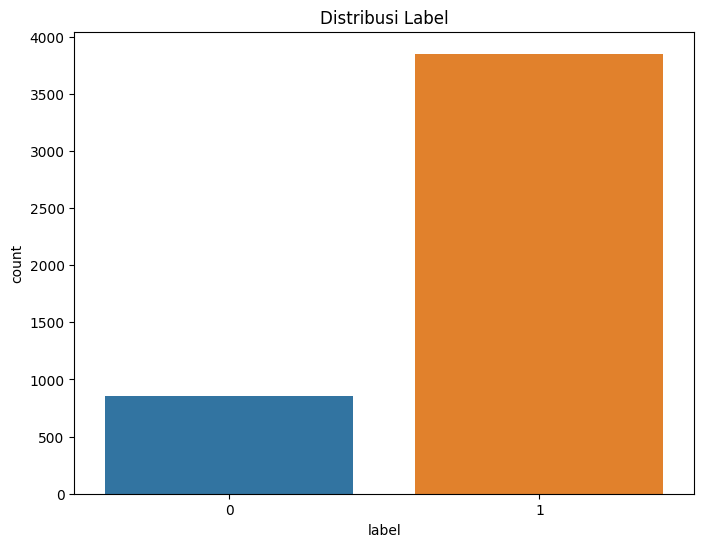

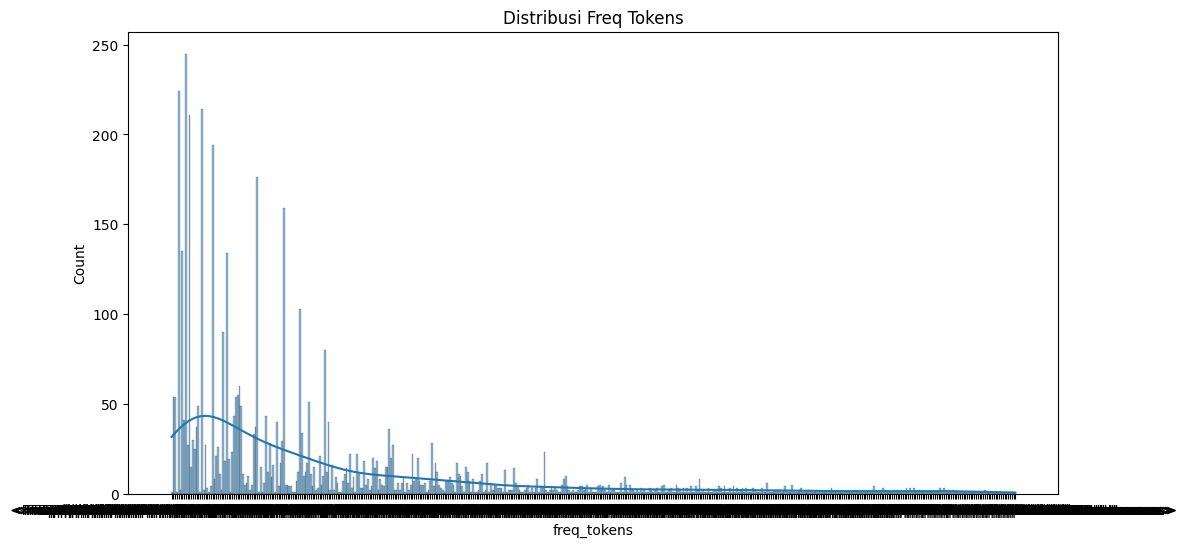

In [ ]:
# 2. Visualisasi Distribusi
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribusi Label')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['freq_tokens'], bins=30, kde=True)
plt.title('Distribusi Freq Tokens')
plt.show()

## Visualisasi

### Wordcloud

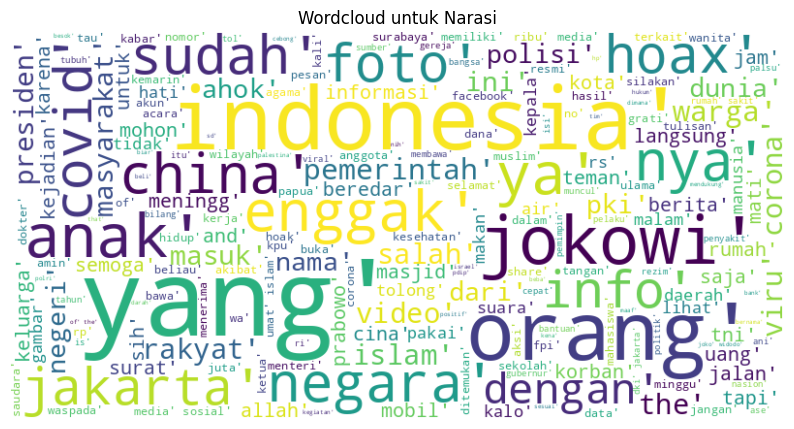

In [ ]:
# Visualisasi Wordcloud untuk Narasi
from wordcloud import WordCloud

# Menggabungkan semua narasi menjadi satu teks
teks_narasi = ' '.join(df['stem_narasi'])

# Membuat dan menampilkan Wordcloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(teks_narasi)
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud untuk Narasi')
plt.show()

In [ ]:
df_filtered = df[df['label'] == 0][['stem_narasi']]

In [ ]:
df_filtered.head()

,stem_narasi
19,"['astaga', 'sandiaga', 'sarankan', 'warga', 'm..."
21,"['irina', 'istri', 'ahli', 'itu', 'hermansyah'..."
22,"['nezar', 'patria', 'kader', 'pki', 'rapat', '..."
55,"['kendati', 'suks', 'mengantarkan', 'timna', '..."
58,"['innalillah', 'lalai', 'terobo', 'razia', 'mo..."


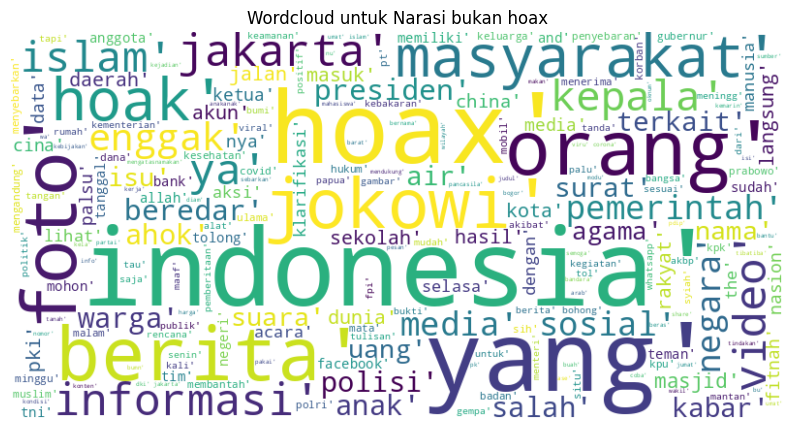

In [ ]:
# Visualisasi Wordcloud untuk Narasi
from wordcloud import WordCloud

# Menggabungkan semua narasi menjadi satu teks
teks_narasi = ' '.join(df_filtered['stem_narasi'])

# Membuat dan menampilkan Wordcloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(teks_narasi)
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud untuk Narasi bukan hoax')
plt.show()

In [ ]:
df_filtered2 = df[df['label'] == 1][['stem_narasi']]

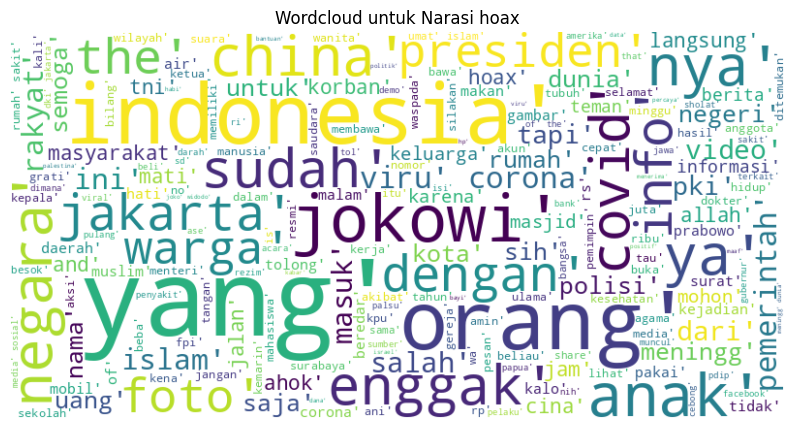

In [ ]:
# Visualisasi Wordcloud untuk Narasi
from wordcloud import WordCloud

# Menggabungkan semua narasi menjadi satu teks
teks_narasi = ' '.join(df_filtered2['stem_narasi'])

# Membuat dan menampilkan Wordcloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(teks_narasi)
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud untuk Narasi hoax')
plt.show()

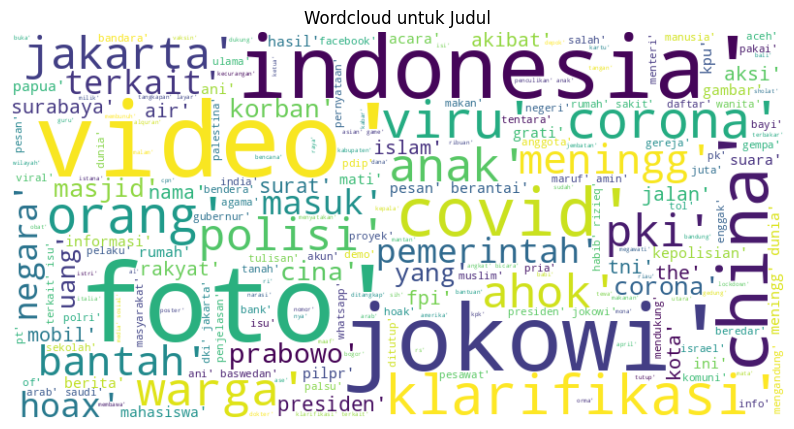

In [ ]:
# Visualisasi Wordcloud untuk Judul
from wordcloud import WordCloud

# Menggabungkan semua judul menjadi satu teks
teks_judul = ' '.join(df['stem_judul'])

# Membuat dan menampilkan Wordcloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(teks_judul)
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud untuk Judul')
plt.show()

In [ ]:
df_filtered3 = df[df['label'] == 0][['stem_judul']]

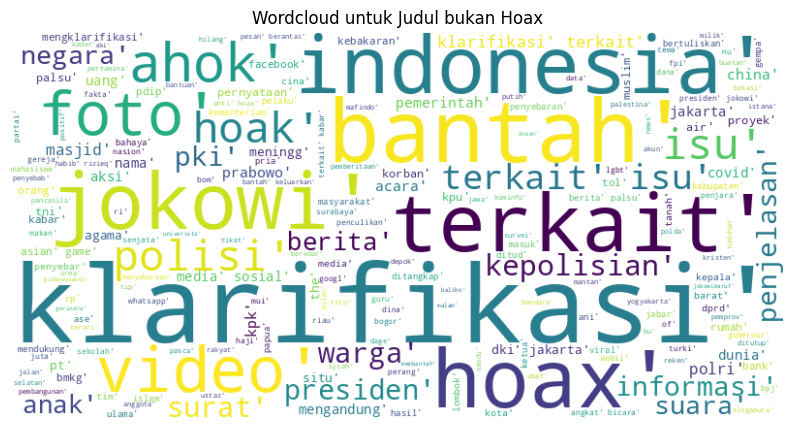

In [ ]:
# Visualisasi Wordcloud untuk Judul
from wordcloud import WordCloud

# Menggabungkan semua judul menjadi satu teks
teks_judul = ' '.join(df_filtered3['stem_judul'])

# Membuat dan menampilkan Wordcloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(teks_judul)
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud untuk Judul bukan Hoax')
plt.show()

In [ ]:
df_filtered4 = df[df['label'] == 1][['stem_judul']]

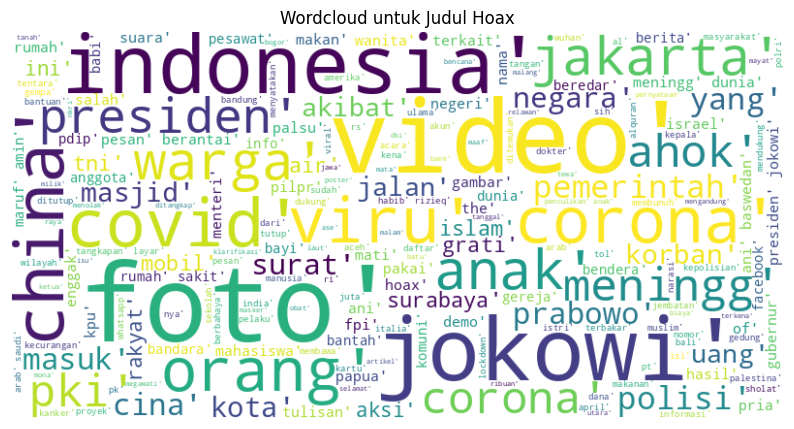

In [ ]:
# Visualisasi Wordcloud untuk Judul
from wordcloud import WordCloud

# Menggabungkan semua judul menjadi satu teks
teks_judul = ' '.join(df_filtered4['stem_judul'])

# Membuat dan menampilkan Wordcloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(teks_judul)
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Wordcloud untuk Judul Hoax')
plt.show()

### Analisis Panjang Judul dan Narasi

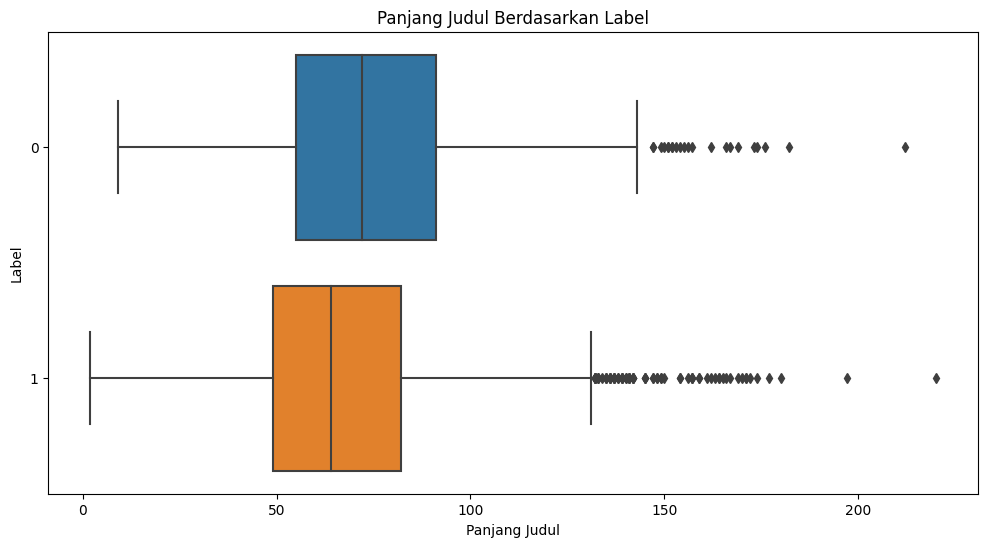

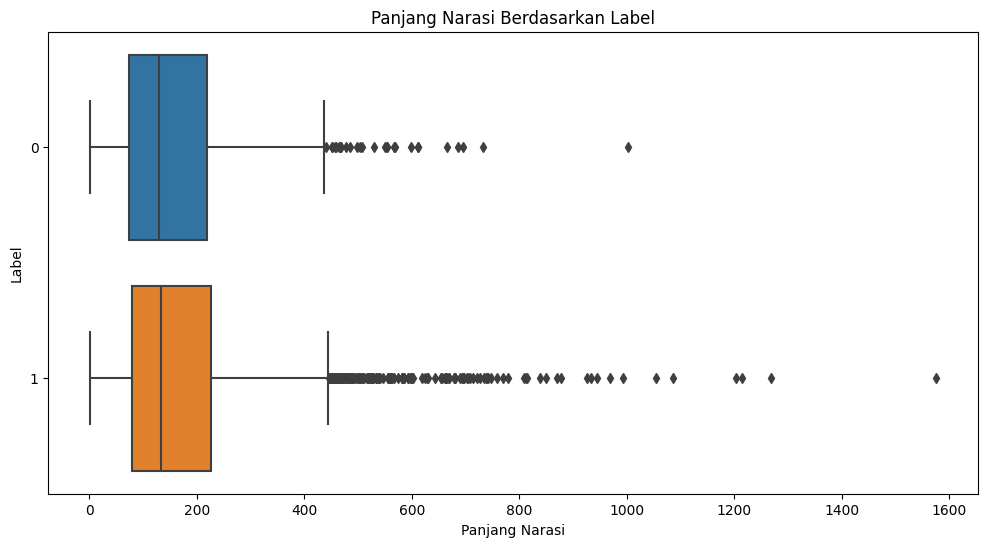

In [ ]:
# Membuat kolom baru untuk panjang judul dan narasi
df['panjang_judul'] = df['stem_judul'].apply(len)
df['panjang_narasi'] = df['stem_narasi'].apply(len)

# Visualisasi panjang judul dan narasi
plt.figure(figsize=(12, 6))
sns.boxplot(x='panjang_judul', y='label', data=df, orient='h')
plt.title('Panjang Judul Berdasarkan Label')
plt.xlabel('Panjang Judul')
plt.ylabel('Label')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='panjang_narasi', y='label', data=df, orient='h')
plt.title('Panjang Narasi Berdasarkan Label')
plt.xlabel('Panjang Narasi')
plt.ylabel('Label')
plt.show()

### Analisis N-gram

In [ ]:
# Analisis N-gram
from sklearn.feature_extraction.text import CountVectorizer

# Bigram
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = vectorizer.fit_transform(df['stem_narasi'])
bigram_matrix

<4701x63086 sparse matrix of type '<class 'numpy.int64'>'
	with 71858 stored elements in Compressed Sparse Row format>

### Analisis Narasi dan Judul List

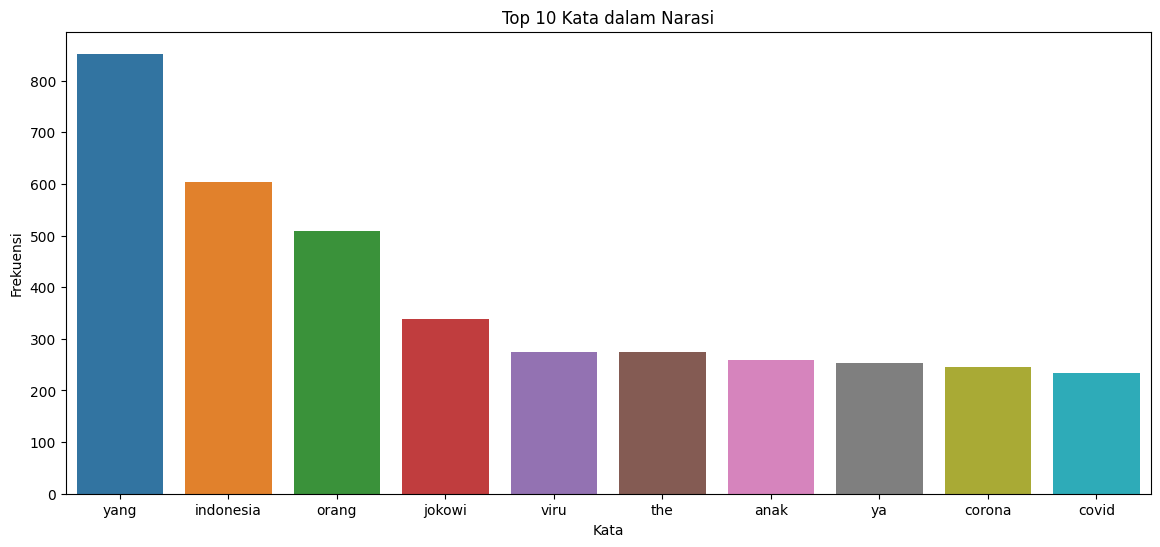

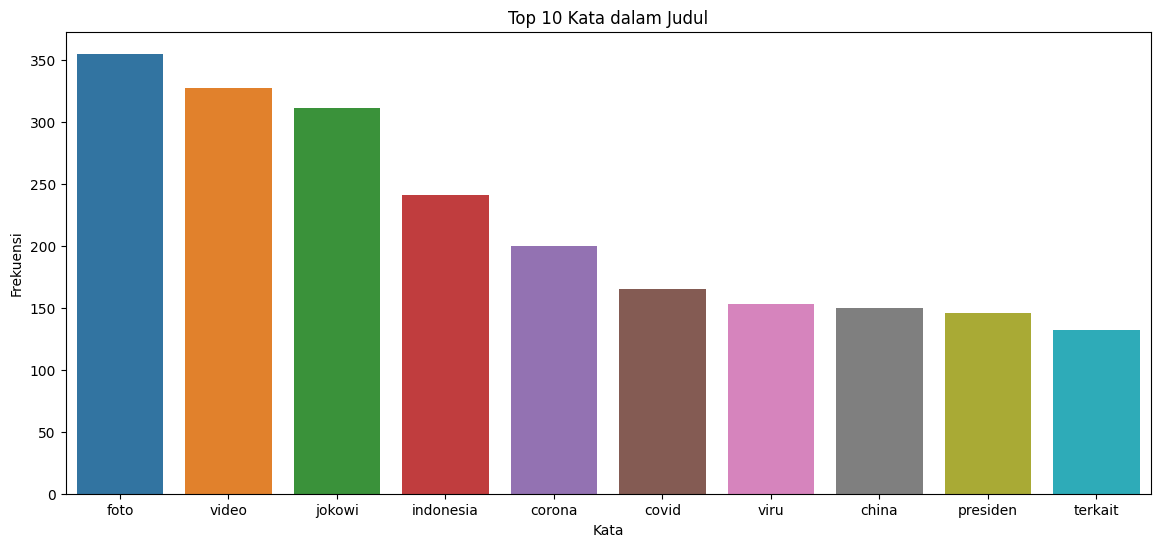

In [ ]:
#  Analisis Narasi dan Judul List
from collections import Counter

narasi_word_freq = Counter([word for sublist in df['narasi_list'].dropna() for word in sublist])
judul_word_freq = Counter([word for sublist in df['judul_list'].dropna() for word in sublist])

top_n = 10

top_narasi_words = narasi_word_freq.most_common(top_n)
top_judul_words = judul_word_freq.most_common(top_n)

plt.figure(figsize=(14, 6))
sns.barplot(x=[word[0] for word in top_narasi_words], y=[word[1] for word in top_narasi_words])
plt.title(f'Top {top_n} Kata dalam Narasi')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x=[word[0] for word in top_judul_words], y=[word[1] for word in top_judul_words])
plt.title(f'Top {top_n} Kata dalam Judul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

### **INTERPRETASI VISUALISASI**

1. **Berdasarkan Distribusi Label** : \

Dari distribusi label, dapat dilihat bahwa jumlah post hoaks (label 1) memiliki jumlah yang jauh lebih banyak dibandingkan bukan hoaks (label 0). Oleh karena terdapat *imbalance* pada data, akan dilakukan resampling untuk mengatasi permasalahan ini




2. **Berdasarkan Visualisasi Narasi**
- Barplot Narasi (all) \
Kata yang paling banyak muncul adalah 'yang','Indonesia', 'orang', 'jokowi', & 'virus'
- Wordcloud Narasi Bukan Hoax \
Kata yang paling banyak muncul adalah 'Indonesia', 'jokowi', 'hoax', 'orang', 'berita'
- Wordcloud Narasi Hoax \
Kata yang paling banyak muncul adalah
'indonesia', 'jokowi', 'orang', 'presiden', & 'jakarta'. \

Hal ini masuk akal, karena topik pembahasan pemilihan presiden sedang hangat di Indonesia, maka akan semakin banyak berita hoax dan bukan hoax yang muncul mengenai presiden, indonesia, dan jokowi. Di bagian berita bukan hoax, terdapat kata 'hoax' dan 'berita' yang juga sering muncul. Hal ini mengindikasikan bahwa berita bukan hoax sering mention mengenai berita hoax yang beredar dan memberikan pernyataan mengenai berita yang sebenarnya.

3. **Berdasarkan Visualisasi Judul**
- Barplot Judul (all) \
Kata yang paling banyak muncul adalah 'foto', 'video', 'jokowi', 'indonesia', & 'corona'.
- Wordcloud Judul Bukan Hoax \
Kata yang paling banyak muncul adalah 'klarifikasi', 'indonesia', 'bantah', 'terkait', &'jokowi'.
- Wordcloud Hoax \
Kata yang paling banyak muncul adalah 'foto', 'video', 'indonesia', 'jokowi', & 'jakarta'.

Hal ini masuk akal, karena pada bagian berita bukan Hoax terdapat kata 'klarifikasi' dan 'bantah'. Berita bukan hoax memang pada dasarknya membantah dan mengklarifikasi mengenai berita hoax yang beredar. Sedangkan pada bagian berita hoax, kata 'foto' dan 'video' juga sering muncul. Berita hoax ingin agar berita nya dipercaya masyarakat, sehingga melampirkan foto atau video yang mungkin bisa menjadi bukti memperkuat argumen.

4. **Berdasarkan Boxplot Analisis Panjang Judul dan Narasi**. \

**Panjang Judul** \
Judul berita hoaks (label 1) relatif lebih singkat dibandingkan judul berita bukan hoaks (label 0) \

**Panjang Narasi** \
Narasi pada berita hoaks (label 1) dan berita bukan hoaks (label 0) tidak memiliki perbedaan yang signifikan. Sehingga, tidak dapat ditentukan suatu berita hoaks atau tidak dari panjang narasinya.

#Modelling

##Loading Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import math
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')
import io
from io import StringIO
import string
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/auliasm17/Kelompok-D-Data-Mining.git
!pip install geopandas
path = '/content/Kelompok-D-Data-Mining/data_preprocess.csv'
data = pd.read_csv(path,sep=',')

Cloning into 'Kelompok-D-Data-Mining'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 689.35 KiB | 11.68 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
data.head()

,Unnamed: 0,label,judul_clean,narasi_clean
0,0,1,pemakaian masker menyebabkan penyakit legionnair,caller tapi radio talk show recent share that ...
1,1,1,instruksi gubernur jateng penilangan yang berm...,ythseluruh anggota grup sesuai instruksi guber...
2,2,1,foto jim rohn jokowi presiden terbaik dalam se...,jokowi presiden terbaik dalam sejarah bangsa i...
3,3,1,politik kenyataan jokowi berhasil memulangkan ...,maaf ma mbak politik kenyataan jokowi berhasil...
4,4,1,foto kadrun kalo lihat foto pana dingin,kadrun kalo lihat foto pana dingin


In [ ]:
data.shape

(4701, 4)

In [ ]:
narasi = data[['label','narasi_clean']]

In [ ]:
narasi.head()

,label,narasi_clean
0,1,caller tapi radio talk show recent share that ...
1,1,ythseluruh anggota grup sesuai instruksi guber...
2,1,jokowi presiden terbaik dalam sejarah bangsa i...
3,1,maaf ma mbak politik kenyataan jokowi berhasil...
4,1,kadrun kalo lihat foto pana dingin


In [ ]:
judul = data[['label','judul_clean']]

In [ ]:
judul.head()

,label,judul_clean
0,1,pemakaian masker menyebabkan penyakit legionnair
1,1,instruksi gubernur jateng penilangan yang berm...
2,1,foto jim rohn jokowi presiden terbaik dalam se...
3,1,politik kenyataan jokowi berhasil memulangkan ...
4,1,foto kadrun kalo lihat foto pana dingin


##Resampling

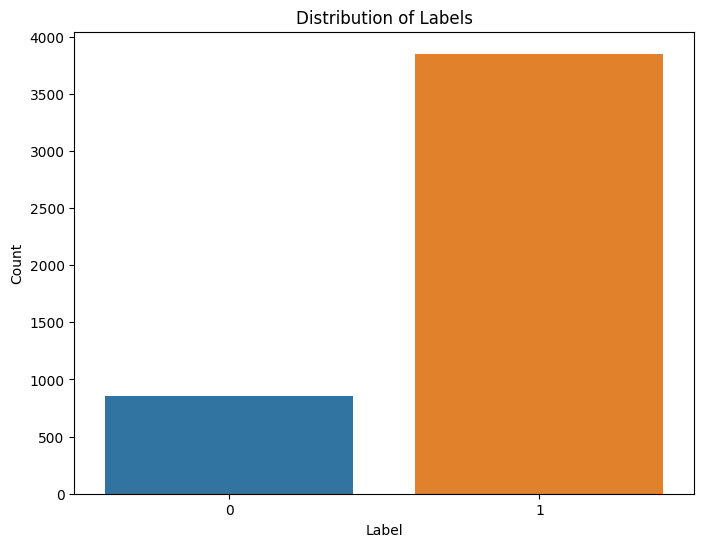

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'label' is the column you want to visualize
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Dari plot di atas, terlihat dataset kita sangat tidak balance. Dimana jumlah label 1 jauh lebih banyak dibanding dengan label 0. Sehingga akan dilakukan proses balancing dengan memilih label 1 secara random

In [ ]:
# Dari cell sebelumnya terlihat jelas bahwa dataset kita sangat tidak balance
# Untuk membuat datasetnya balance

# Pilih dataset dengan label 1 dan lakukan randomisasi untuk setiap baris datanya
false_news = data[data['label'] == 1].sample(frac=1)

# Concat dataset berlabel 1 yang telah dipilih dengan dataset berlabel 0
# dimana jumlah dataset berlabel 1 yang digabungkan sejumlah banyak dataset berlabel 0 + 200
true_fact = data[data['label'] == 0]
data = true_fact.append(false_news[:len(true_fact)])

data

,Unnamed: 0,label,judul_clean,narasi_clean
19,19,0,sandi sarankan warga mengadu kelurahan,astaga sandiaga sarankan warga mengadu kelurah...
21,21,0,irina istri ahli itu hermansyah mantan psk,irina istri ahli itu hermansyah mantan psk
22,22,0,nezar patria kader pki rapat malam istana jam ...,nezar patria kader pki rapat malam istana jam ...
55,55,0,coach indra sjafri digaji ikhla,kendati suks mengantarkan timna indonesia juar...
58,58,0,kronolog polisi berondong sedan terobo razia l...,innalillah lalai terobo razia mobil berisi kel...
...,...,...,...,...
208,208,1,ridwan kamil ditingg pemilih religiu pilgub ja...,dukung lgbt ridwan kamil ditingg pemilih releg...
2938,2938,1,sultan erdogan memanggul keranda muhammad ali,sultan erdogan memanggul jenazah muhammad ali ...
1890,1890,1,video bala dendam siswa korban bulli,anak bulli sekolah membalaskan temannya cairan...
3397,3397,1,rezim kodok anti islam,pelarangan sholat sekolah pelarangan pemakaian...


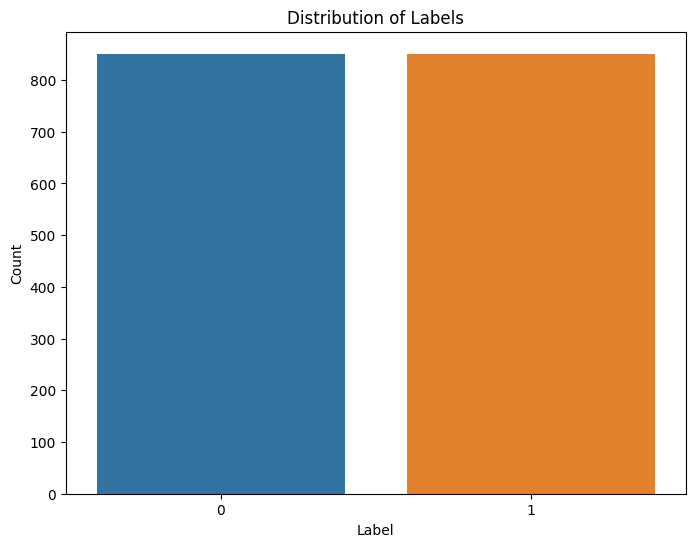

In [ ]:
# Assuming df is your DataFrame and 'label' is the column you want to visualize
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Melalui resampling, diperoleh jumlah variabel target/label yang bernilai 0 (menyatakan bukan Hoax) dan 1 (menyatakan post Hoax) dengan jumlah yang sama. Sehingga data sudah balance

#Narasi

###Bagi Data Train dan Test

In [ ]:
X = data['narasi_clean']
Y = data['label']

In [ ]:
seed = 99
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [ ]:
x_train.sample(7)

408     milleni road safeti festiv polr bogor minggu t...
2589    gegerkan publik tanah air media negeri tuli pe...
237     staf bkd papua uang menjanjikan jatah penerima...
2314    china kepanikan orang china akibat kepanikan o...
1352    selamat bu susi dirut garuda yang baruibu susi...
2024    mesjid nurul ulum universita jender sudirman p...
2239    pki cina sudah merampa indonesia bersumpah men...
Name: narasi_clean, dtype: object

###VSM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(smooth_idf= True, sublinear_tf=True,ngram_range=(1, 2), max_df=0.90, min_df=2)
x_train = tfidf_vectorizer.fit_transform(x_train.values.astype('U')) # "Fit_Transform"
x_test = tfidf_vectorizer.transform(x_test.values.astype('U')) # Perhatikan disini hanya "Transform"
print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(1191, 3018) (511, 3018)


In [ ]:
def hapusKosong(X,Y):
    Y = Y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, Y
x_train, y_train = hapusKosong(x_train, y_train)
x_test, y_test = hapusKosong(x_test, y_test)
print(x_train.shape, x_test.shape)

(1184, 3018) (507, 3018)


###SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import time
from sklearn.feature_extraction.text import CountVectorizer

dSVM = svm.SVC(decision_function_shape='ovo') # oneversus one SVM
dSVM.fit(x_train, y_train)

y_SVM = dSVM.predict(x_test)
print ('Akurasi = ',accuracy_score(y_test, y_SVM))

#Confusion Matrix
print('presisi = ', precision_score(y_test, y_SVM))
print('Recall = ', recall_score(y_test, y_SVM))
print('f1_score = ', f1_score(y_test, y_SVM))

print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

#Cross Validation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X.values.astype('U'))
Y = np.array(Y)

svm_ = svm.SVC(kernel='linear', decision_function_shape='ovo')
mulai = time.time()
scores_svm = cross_val_score(svm_, X, Y, cv=10, n_jobs=-2)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Akurasi =  0.6331360946745562
presisi =  0.5782747603833865
Recall =  0.7702127659574468
f1_score =  0.6605839416058393
[[140 132]
 [ 54 181]]
              precision    recall  f1-score   support

           0       0.72      0.51      0.60       272
           1       0.58      0.77      0.66       235

    accuracy                           0.63       507
   macro avg       0.65      0.64      0.63       507
weighted avg       0.66      0.63      0.63       507

Accuracy SVM: 0.60 (+/- 0.08), Waktu = 4.375 detik


Pada percobaan 1, digunakan label sebagai variabel dependen Y. Sedangkan variabel X merupakan narasi. Support Vector Machine (SVM) adalah salah satu algoritma klasifikasi dan regresi dalam machine learning. Pada model SVM diperoleh **nilai Akurasi yaitu 0.62 (+/- 0.06)**

Nilai akurasi menunjukkan kinerja yang cukup baik dalam memprediksi kelas yang benar (hoaks atau fakta). Nilai **presisi sebesar**
 **0.57(+/-)** cukup rendah yang berarti terkadang ketika model memprediksi berita tersebut merupakan hoaks, itu bisa jadi salah. Namun, **recall yang cukup tinggi sebesar 0.73 (+/-0.06)** berarti bahwa model cukup baik mengenali berita hoaks.

Confusion Matrix menunjukkan terdapat +/-148 prediksi benar mengenai berita bukan hoaks, +/-172 prediksi benar mengenai berita hoaks, +/-126 prediksi salah mengenai berita bukan hoaks, dan +/-62 prediksi salah mengenai berita hoaks

Hal ini cukup baik mengingat nilai recall yang cukup tinggi memungkinkan model mendeteksi berita hoaks untuk mengurangi beredarnya berita hoaks di masyarakat

###Logistik Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
y_reglog = clf.predict(x_test)
print ('Akurasi = ',accuracy_score(y_test, y_reglog))

#Confusion Matrix
print('presisi = ', precision_score(y_test, y_reglog))
print('Recall = ', recall_score(y_test, y_reglog))
print('f1_score = ', f1_score(y_test, y_reglog))
print(confusion_matrix(y_test, y_reglog))
print(classification_report(y_test, y_reglog))

#Cross Validation
mulai = time.time()
scores_regLog = cross_val_score(clf, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Akurasi =  0.6469428007889546
presisi =  0.596551724137931
Recall =  0.7361702127659574
f1_score =  0.659047619047619
[[155 117]
 [ 62 173]]
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       272
           1       0.60      0.74      0.66       235

    accuracy                           0.65       507
   macro avg       0.66      0.65      0.65       507
weighted avg       0.66      0.65      0.65       507

Accuracy Regresi Logistik: 0.61 (+/- 0.09), Waktu = 0.817 detik


Pada percobaan 1, digunakan label sebagai variabel dependen Y. Sedangkan variabel X merupakan narasi.Logistic Regression adalah suatu metode statistik yang digunakan untuk melakukan klasifikasi pada data dengan dua atau lebih kategori. Pada model Regresi Logistik diperoleh  **nilai Akurasi yaitu 0.62 (+/- 0.06).**

Nilai akurasi menunjukkan kinerja yang cukup dalam memprediksi kelas yang benar (hoaks atau fakta). Nilai **presisi sebesar**
 **0.58 (+/-0.06)** cukup rendah yang berarti terkadang ketika model memprediksi berita tersebut merupakan hoaks, itu bisa jadi salah. Namun, **recall yang cukup tinggi sebesar 0.73 (+/-)** berarti bahwa model cukup baik mengenali berita hoaks.

Confusion Matrix menunjukkan terdapat +/-159 prediksi benar mengenai berita bukan hoaks, +/-160 prediksi benar mengenai berita hoaks, +/-115 prediksi salah mengenai berita bukan hoaks, dan +/-74 prediksi salah mengenai berita hoaks

Hal ini cukup baik mengingat nilai recall yang cukup tinggi memungkinkan model mendeteksi berita hoaks untuk mengurangi beredarnya berita hoaks di masyarakat

#Judul

##Bagi Data Train dan Test

In [ ]:
X2 = data['judul_clean']
Y = data['label']

In [ ]:
seed = 99
x2_train, x2_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=seed)

In [ ]:
x2_train.sample(7)

133                                   rekrutmen pt pindad
2689    charta politika survei nasion simulasi jokowi ...
2093     michael jackson islam ini my vein unpublish song
3122                          akun twitter antasari azhar
1207    unggahan hasil pleno tp bangil pasuruan berbed...
768           editan poster acara jakgram menunjukan jari
1453                       jepang ancam menarik investasi
Name: judul_clean, dtype: object

##VSM

In [ ]:
tfidf_vectorizer = TfidfVectorizer(smooth_idf= True, sublinear_tf=True,ngram_range=(1, 2), max_df=0.90, min_df=2)
x2_train = tfidf_vectorizer.fit_transform(x2_train.values.astype('U')) # "Fit_Transform"
x2_test = tfidf_vectorizer.transform(x2_test.values.astype('U')) # Perhatikan disini hanya "Transform"
print(x2_train.shape, x2_test.shape) # Jumlah kolom Sama ==> ini penting

(1191, 1521) (511, 1521)


In [ ]:
def hapusKosong(X2,Y):
    Y = Y[X2.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X2 = X2[X2.getnnz(1)>0] # Remove Zero Rows
    return X2, Y
x2_train, y_train = hapusKosong(x2_train, y_train)
x2_test, y_test = hapusKosong(x2_test, y_test)
print(x2_train.shape, x2_test.shape)

(1175, 1521) (494, 1521)


##SVM

In [ ]:
dSVM = svm.SVC(decision_function_shape='ovo') # oneversus one SVM
dSVM.fit(x2_train, y_train)

y_SVM = dSVM.predict(x2_test)
print ('Akurasi = ',accuracy_score(y_test, y_SVM))

#Confusion Matrix
print('presisi = ', precision_score(y_test, y_SVM))
print('Recall = ', recall_score(y_test, y_SVM))
print('f1_score = ', f1_score(y_test, y_SVM))

print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

#Cross Validation
vectorizer = CountVectorizer()
X2 = vectorizer.fit_transform(X2.values.astype('U'))
Y = np.array(Y)

svm_ = svm.SVC(kernel='linear', decision_function_shape='ovo')
mulai = time.time()
scores_svm = cross_val_score(svm_, X2, Y, cv=10, n_jobs=-2)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Akurasi =  0.6639676113360324
presisi =  0.5993377483443708
Recall =  0.8008849557522124
f1_score =  0.6856060606060607
[[147 121]
 [ 45 181]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       268
           1       0.60      0.80      0.69       226

    accuracy                           0.66       494
   macro avg       0.68      0.67      0.66       494
weighted avg       0.69      0.66      0.66       494

Accuracy SVM: 0.64 (+/- 0.04), Waktu = 5.302 detik


Pada percobaan 2, digunakan label sebagai variabel dependen Y. Sedangkan variabel X merupakan judul. Support Vector Machine (SVM) adalah salah satu algoritma klasifikasi dan regresi dalam machine learning. Pada model SVM diperoleh **nilai Akurasi yaitu 0.64 (+/- 0.08)**

Nilai akurasi menunjukkan kinerja yang cukup baik dalam memprediksi kelas yang benar (hoaks atau fakta). Nilai **presisi sebesar**
 **0.61** cukup yang berarti terkadang ketika model memprediksi berita tersebut merupakan hoaks, itu bisa jadi salah. Namun, **recall yang cukup tinggi sebesar 0.78** berarti bahwa model cukup baik mengenali berita hoaks.

Confusion Matrix menunjukkan terdapat +/-153 prediksi benar mengenai berita bukan hoaks, +/-177 prediksi benar mengenai berita hoaks, +/-111 prediksi salah mengenai berita bukan hoaks, dan +/-51 prediksi salah mengenai berita hoaks

Hal ini cukup baik mengingat nilai recall yang cukup tinggi memungkinkan model mendeteksi berita hoaks untuk mengurangi beredarnya berita hoaks di masyarakat

##Logistik Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x2_train, y_train)
y_reglog = clf.predict(x2_test)
print ('Akurasi = ',accuracy_score(y_test, y_reglog))

#Confusion Matrix
print('presisi = ', precision_score(y_test, y_reglog))
print('Recall = ', recall_score(y_test, y_reglog))
print('f1_score = ', f1_score(y_test, y_reglog))
print(confusion_matrix(y_test, y_reglog))
print(classification_report(y_test, y_reglog))

#Cross Validation
mulai = time.time()
scores_regLog = cross_val_score(clf, X2, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Akurasi =  0.6781376518218624
presisi =  0.6151202749140894
Recall =  0.7920353982300885
f1_score =  0.6924564796905223
[[156 112]
 [ 47 179]]
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       268
           1       0.62      0.79      0.69       226

    accuracy                           0.68       494
   macro avg       0.69      0.69      0.68       494
weighted avg       0.70      0.68      0.68       494

Accuracy Regresi Logistik: 0.66 (+/- 0.05), Waktu = 1.099 detik


Pada percobaan 1, digunakan label sebagai variabel dependen Y. Sedangkan variabel X merupakan narasi.Logistic Regression adalah suatu metode statistik yang digunakan untuk melakukan klasifikasi pada data dengan dua atau lebih kategori. Pada model Regresi Logistik diperoleh  **nilai Akurasi yaitu 0.67 (+/- 0.08).**

Nilai akurasi menunjukkan kinerja yang cukup dalam memprediksi kelas yang benar (hoaks atau fakta). Nilai **presisi sebesar**
 **0.63** cukup rendah yang berarti terkadang ketika model memprediksi berita tersebut merupakan hoaks, itu bisa jadi salah. Namun, **recall yang cukup tinggi sebesar 0.75** berarti bahwa model cukup baik mengenali berita hoaks.

Confusion Matrix menunjukkan terdapat +/-163 prediksi benar mengenai berita bukan hoaks, +/-171 prediksi benar mengenai berita hoaks, +/-101 prediksi salah mengenai berita bukan hoaks, dan +/-57 prediksi salah mengenai berita hoaks

Hal ini cukup baik mengingat nilai recall yang cukup tinggi memungkinkan model mendeteksi berita hoaks untuk mengurangi beredarnya berita hoaks di masyarakat

###Kesimpulan

Telah dilakukan pemodelan dan dibentuk empat model dan dilakukan analisis Metrik Evaluasi dengan meninjau metrik evaluasi model seperti **akurasi, presisi, recall, F1-score.** Dari metrik tersebut, akan dicari model dengan metrik evaluasi paling baik.

Pilihan antara model tergantung pada prioritas Anda terkait dengan recall, presisi, dan waktu pelatihan. Dalam hal ini, tujuannya adalah mendeteksi sebanyak mungkin berita hoaks (recall yang tinggi). Recall merupakan evaluasi yang mengukur kemampuan sistem atau model untuk mengidentifikasi semua contoh positif yang sebenarnya (ini maksdnya bukan hoaks tp diprediksinya hoaks). Sehingga model SVM lebih baik dibandingkan model LR (Logit Regression).